In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


<h2>EDA:</h2>

<h2>1. Compare the frequencies of the different types of shows in Netflix:</h2>

<AxesSubplot:xlabel='type'>

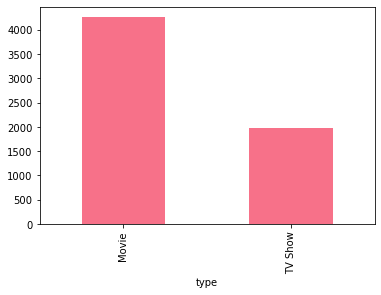

In [3]:
sns.set_palette("husl")
group_types = df.groupby(["type"]).count()["show_id"]
group_types.plot(kind="bar")

<AxesSubplot:ylabel='show_id'>

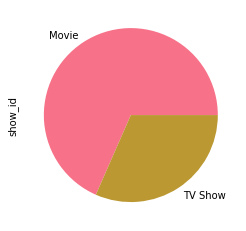

In [4]:
group_types.plot(kind="pie")

In [5]:
group_types

type
Movie      4265
TV Show    1969
Name: show_id, dtype: int64

<h4>We can deduce that the movie shows is more than half of the data (68%)</h4>

<h2>2. Show the relation between the years and the type of the show:</h2>

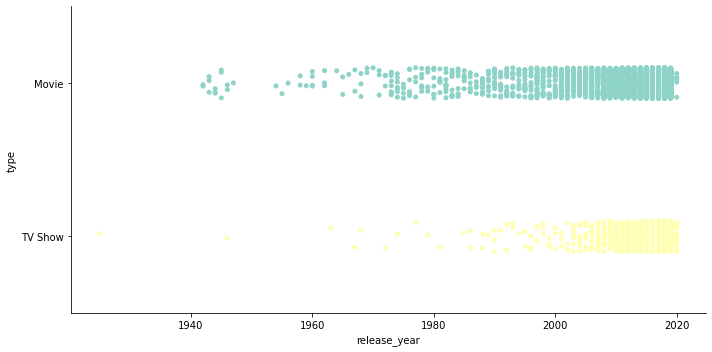

In [11]:
sns.set_palette("Set3")
sns.catplot(x="release_year", y="type", data=df, aspect=2)

<h4>Before the year 2000 the movies presence of movies in netflix was more than the TV Shows after that the frequencies of the Mobie shows and the TV shows are nearly</h4>

<h2>3. Show the relationship between the country and the rating of the movies based on the type</h2>

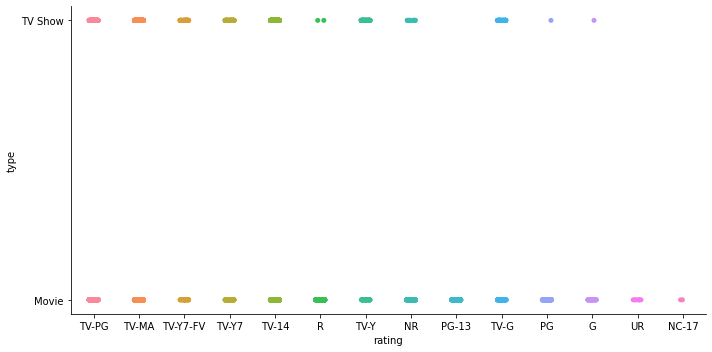

In [38]:
sns.catplot(x="rating", y="type", data=df, aspect=2)

<h4>We can deduce that there is no TV Show with rating PG-13, UR and NC-17 so netflix needs to add TV Shows with this rating to satisfy all there cutomers.</h4>

<h2>4. Show the percentage of shows sutable to kids:</h2>

In [42]:
kids_cnt = 0
for i in df["listed_in"]:
    if 'kids' in i or 'Children' in i:
        kids_cnt += 1
kids_cnt

378

<AxesSubplot:>

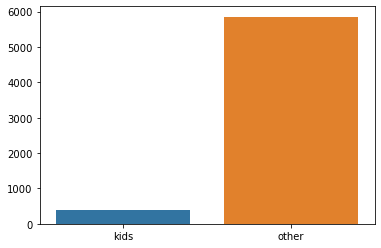

In [47]:
dic = {
    'kids': kids_cnt,
    'other': df.shape[0] - kids_cnt
}

sns.barplot(x=list(dic.keys()), y = list(dic.values()))

the percentage of kids shows: 

In [48]:
kids_cnt*100/df.shape[0]

6.063522617901829

<h4>So we can deduce that the kids shows percentage in netflix is 6% so netflix needs to increase the kids shows.</h4>

<h2>5. Check Which director has the greatest number of shows on netflix:</h2>

In [66]:
group_dir = df.groupby(["director"]).count()["show_id"]
group_dir

director
A. L. Vijay            2
A. Salaam              1
A.R. Murugadoss        3
Aadish Keluskar        1
Aamir Bashir           1
                      ..
Çagan Irmak            1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       2
Şenol Sönmez           2
Name: show_id, Length: 3301, dtype: int64

<AxesSubplot:xlabel='director'>

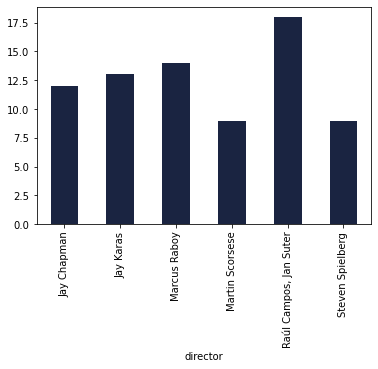

In [69]:
sns.set_palette("cubehelix")
group_dir[group_dir>=9].plot(kind="bar")

<h4>Raúl Campos, Jan Suter are the directors that have the greater number of shows on netflix.</h4>

<h2>6. Check the number of shows released during the years:</h2>

In [79]:
group_year = df.groupby(["release_year"]).count()["show_id"]
df["release_year"].value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1966       1
1959       1
1964       1
1925       1
1963       1
Name: release_year, Length: 72, dtype: int64

<AxesSubplot:xlabel='release_year'>

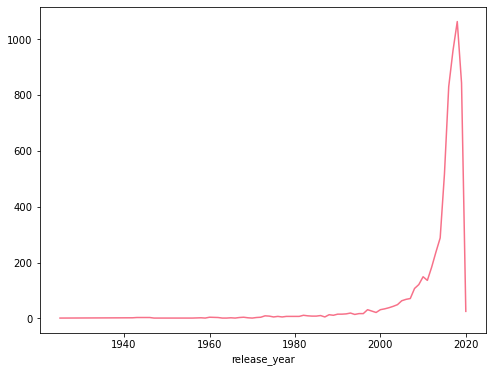

In [83]:
sns.set_palette("husl")
group_year.plot(kind="line", figsize=(8, 6))

<h4>We can deduce that there was an increase from year 2000 to year 2018 (It's peak) and begin to decrease until 2020</h4>

<h2>7. Check The Country that most produces shows:</h2>

In [81]:
group_country = df.groupby(["country"]).count()["show_id"]

<AxesSubplot:xlabel='country'>

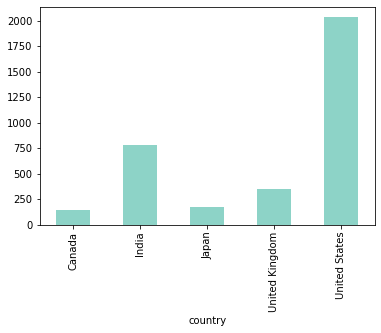

In [85]:
sns.set_palette("Set3")
group_country[group_country>=140].plot(kind="bar")

<h4>So we can deduce that the United States is the country with the most shows number on Netflix.</h4>

<h2>8. The relation between the rating and the release year of the show:</h2>

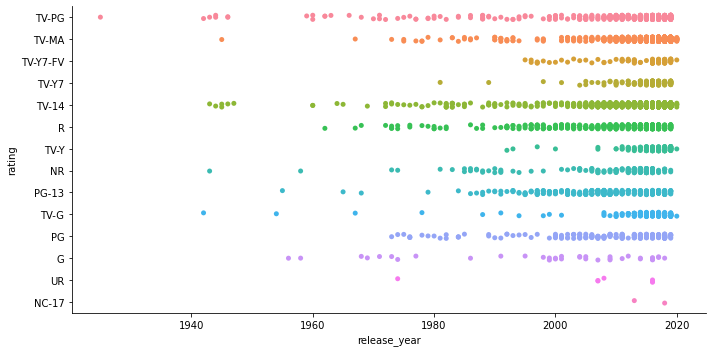

In [86]:
sns.catplot(x="release_year", y="rating", data=df, aspect=2)

<h4>Before the year 1980 there was no shows with rating TV-Y7-FV, TV-Y and NC-17</h4>